<a href="https://colab.research.google.com/github/saralafia/adrl/blob/master/Enabling_the_Discovery_of_Thematically_Related_Research_Objects_with_Spatializations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enabling the Discovery of Thematically Related Research Objects with Spatializations

**Motivation**: To facilitate the discovery of related research objects in the multidisciplinary context of a university

**Goal**: To produce spatializations that enable scholars to explore the thematic similarity of research resources by linking existing spatialization techniques to core concepts of spatial information

**Implementation**: Two spatialized views of a repository of masters and doctoral theses available through the Alexandria Digital Research Library


## Sections in this notebook

### Preprocessing
1. [Harvesting metadata
](https://colab.research.google.com/drive/14DbDk0GX-qHoBZ8ulS-ES6RMyL_o3KKz#scrollTo=xbF8bPBdng0U)

2. [Extracting Text](https://colab.research.google.com/drive/14DbDk0GX-qHoBZ8ulS-ES6RMyL_o3KKz#scrollTo=4A3CTXIb1Fmu)
3. [Modelling Topics](https://colab.research.google.com/drive/14DbDk0GX-qHoBZ8ulS-ES6RMyL_o3KKz#scrollTo=ZR-dijR30xtb)

### Self Organising Map
### Network 
4. Introduction to NetworkX in Python
5. Using data from UCSB student thesis metadata
6. Comparing the SOM and the Network
7. Comparing selected dissertations in Network and Self Organising Map

### More Resources
Spatializing research resources available through this [public library repository](https://alexandria.ucsb.edu/collections/f3348hkz).



##Preprocessing

### Harvesting metadata
To run`website_to_text_2.py` script (in Python 2.7), first, load in the libraries.

In [0]:
from bs4 import BeautifulSoup
import urllib
import re

Load in text files with the library metadata.

In [0]:
input_file = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/adrl_websites_pid.txt', 'r')
input_lines = input_file.readlines()
input_file.close()
output_file = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/metadata_html.txt', 'w')

In [0]:
for line in input_lines:
    address_list = line.split(' ')
    #print address

for address in address_list:    
    r = urllib.urlopen(address)
    soup = BeautifulSoup(r)
    soup.prettify()
    #print soup
    output_file.write(str(soup) + '\n')
output_file.close()


In [0]:
pid_file = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/metadata_html.txt', 'r')
pid_file_addresses = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/pids.txt', 'w')
input_pid_file = pid_file.read()

print "All search results (incl. pids) successfully retrieved"

Cleaning the data and converting to HTML

In [0]:
#print input_pid_file
substitute_tags = re.sub(r'\{\"docs\"\:\[\{\"pid\"\:\"', '', input_pid_file)
substitute_tags = re.sub(r'\",\"title.*?\{\"pid\"\:\"', '\n', substitute_tags)
substitute_tags = re.sub(r'\",\"title.*?\"\}\]\}', '', substitute_tags)
substitute_tags = re.sub(r'\n', '.ttl\nhttp://alexandria.ucsb.edu/lib/ark:/48907/', substitute_tags, flags=re.DOTALL)
substitute_tags = re.sub(r'f3bz65v3', 'http://alexandria.ucsb.edu/lib/ark:/48907/f3bz65v3', substitute_tags, flags=re.DOTALL)
substitute_tags = re.sub(r'f3348hkz.ttl\nhttp://alexandria.ucsb.edu/lib/ark:/48907/', 'f3348hkz.ttl', substitute_tags, flags=re.DOTALL)
substitute_tags = re.sub(r'\n', ' ', substitute_tags, flags=re.DOTALL)
#print substitute_tags
pid_file_addresses.write(str(substitute_tags))

pid_file.close()
pid_file_addresses.close()

print "All pids converted into HTML"


In [0]:
iterate_pid_file = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/pids.txt', 'r')
pids = iterate_pid_file.readlines()
iterate_pid_file.close()
pid_metadata = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/pid_metadata.txt', 'w')
n = 0

Retrieving metadata

In [0]:
for line in pids:
    pid_list = line.split(' ')
    #print pid_list
    
for pid in pid_list:    
    p = urllib.urlopen(pid)
    soup = BeautifulSoup(p)
    soup.prettify()
    #print soup
    pid_metadata.write(str(soup) + '\n')
    n += 1
    print "Document nr " + str(n) + " successfully retrieved"

pid_metadata.close()

print "Metadata successfully retrieved"


In [0]:
metadata_file = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/pid_metadata.txt', 'r')
metadata_reading = metadata_file.read()
metadata_file.close()
metadata_file_sorted = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/metadata.txt', 'w')

In [0]:
substitute_metadata = re.sub(r'\,\n', ' ', metadata_reading, flags=re.DOTALL)
metadata_file_sorted.write(substitute_metadata)

metadata_file_sorted.close()

In [0]:
metadata_table = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/metadata_table_special_characters_resolved.txt', 'w')
metadata_file_input = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/metadata.txt', 'r')
metadata_lines = metadata_file_input.readlines()
m = 0
#print metadata_lines

In [0]:
metadata_table.write('title' + "\t" + 'year' + "\t" + 'author' + "\t" + 'degree grantor' + "\t" + 'degree supervisor' + "\t" + 'description' + "\t" + 'language' + "\n")

for line in metadata_lines:
    if 'title=""' in line:
        #print line
        #m += 1
        #print m
        substitute_title = re.sub(r'   \<http\: dc\=\"\" purl.org\=\"\" terms\=\"\" title\=\"\"> ', '', line)
        substitute_title = re.sub(r'\"\;\n', '"', substitute_title)
        substitute_title = re.sub(r'\"', '', substitute_title, 1)
        substitute_title = ''.join(substitute_title.rsplit('\"', 1))
        substitute_title = re.sub(r'\\\"', '\"', substitute_title)
        print substitute_title + "\t"
        metadata_table.write(substitute_title + "\t")
    elif 'dissertationyear' in line:
        substitute_year = re.sub(r'   \<http\: bibframe\.org=\"\" dissertationyear=\"\" vocab\=\"\"> ', '', line)
        substitute_year = re.sub(r'\"\;\n', '"', substitute_year)
        substitute_year = re.sub(r'\"', '', substitute_year, 1)
        substitute_year = ''.join(substitute_year.rsplit('\"', 1))
        print substitute_year + "\t"
        metadata_table.write(substitute_year + "\t")
    elif 'aut="" ' in line:
        substitute_author = re.sub(r'   \<http\: aut\=\"\" id\.loc\.gov\=\"\" relators\=\"\" vocabulary\=\"\"> ', '', line)
        substitute_author = re.sub(r'\"\;\n', '"', substitute_author)
        substitute_author = re.sub(r'\"', '', substitute_author, 1)
        substitute_author = ''.join(substitute_author.rsplit('\"', 1))
        #m += 1
        print substitute_author + "\t"
        #print m
        metadata_table.write(substitute_author + "\t")
    elif 'dgg="" id.loc.gov=""' in line:
        substitute_dgg = re.sub(r'   \<http\: dgg\=\"\" id\.loc\.gov\=\"\" relators\=\"\" vocabulary\=\"\"> ', '', line)
        substitute_dgg = re.sub(r'\"\;\n', '"', substitute_dgg)
        substitute_dgg = re.sub(r'\"', '', substitute_dgg, 1)
        substitute_dgg = ''.join(substitute_dgg.rsplit('\"', 1))
        substitute_dgg = re.sub(r'\&amp\;', 'and', substitute_dgg)
        #m += 1
        print substitute_dgg + "\t"
        #print m
        metadata_table.write(substitute_dgg + "\t")
    elif 'dgs=""' in line:
        substitute_dgs = re.sub(r'   \<http\: dgs=\"\" id\.loc\.gov\=\"\" relators\=\"\" vocabulary\=\"\"> ', '', line)
        substitute_dgs = re.sub(r'\"\;\n', '"', substitute_dgs)
        substitute_dgs = re.sub(r'\"', '', substitute_dgs, 1)
        substitute_dgs = ''.join(substitute_dgs.rsplit('\"', 1))
        substitute_dgs = re.sub(r'\"      \"', ', ', substitute_dgs)
        #m += 1
        print substitute_dgs + "\t"
        #print m
        metadata_table.write(substitute_dgs + "\t")
    elif 'description=""' in line:
        substitute_description = re.sub(r'   \<http\: dc\=\"\" description\=\"\" purl\.org\=\"\" terms\=\"\"\> ', '', line)
        substitute_description = re.sub(r'\"\;\n', '"', substitute_description)
        substitute_description = re.sub(r'\"', '', substitute_description, 1)
        substitute_description = ''.join(substitute_description.rsplit('\"', 1))
        substitute_description = re.sub(r'\\\\n\\\\n', ' ', substitute_description)
        substitute_description = re.sub(r'\\\"', '\"', substitute_description)
        substitute_description = re.sub(r'\"      \"', ' ', substitute_description)
        #m += 1
        print substitute_description + "\t"
        #print m
        metadata_table.write(substitute_description + "\t")
    elif 'dc="" language' in line:        
        substitute_language = re.sub(r'   \<http\: dc\=\"\" language\=\"\" purl\.org=\"\" terms\=\"\"> ', '', line)
        substitute_language = re.sub(r'\"\;\n', '"', substitute_language)
        substitute_language = re.sub(r'\"', '', substitute_language, 1)
        substitute_language = ''.join(substitute_language.rsplit('\"', 1))
        m += 1
        print substitute_language + "\t"
        print m
        metadata_table.write(substitute_language + "\n")
        

print "Script finished successfully"


### Extracting Text
Run the `htmlparser_ucsb.py` script (in Python 3). Copy and paste the output of the `htmlparser_ucsb.py` into an Excel table. Arrange the Excel table as follows: 
1. column: identifier (i.e., pid), 
2. column: label (i.e., pid), 
3. column: title, 
4. column description. 

Copy and paste the Excel table contents into a text editor. Substitute all `"\t"` by a `","` and save the file (`adrl_raw.csv`).


Import the `html.parser` library.

In [0]:
import html.parser

In [0]:
input_file = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/metadata_table_special_characters_resolved.txt', 'r', encoding="utf-8")
input_lines = input_file.read()
input_file.close()

print ("Inducing the HTML parsing method...")


In [0]:
h = html.parser.HTMLParser()

print ("Starting to parse the HTML-file...")

parsed_html = h.unescape(input_lines)
#print (parsed_html)

 It's important to include the `encoding = "utf-8"` statement at the end of the open statement. Otherwise there will be shown error messages. 


In [0]:
print ("Starting to write the output file...")

output_file = open('C:/Users/abruggma/Documents/_PhD/Santa_Barbara/ADRL/metadata_table_html_parsed.txt', 'w', encoding="utf-8")
output_file.write(parsed_html)
output_file.close()

print ("\n***HTML parsing: DONE***\n")

### Modelling topics
To create the MALLET file, run:

In [0]:
C:\mallet>bin\mallet import-file 
  --input c:\mallet\data_ucsb\adrl.txt 
    --output c:\mallet\data_ucsb\adrl_stopwords_remove.mallet 
    --keep-sequence 
    --stoplist-file c:\mallet\stoplists\en.txt

Next, use the following command line prompt for testing the model fit of different topic model solutions (i.e. to try different numbers of topics):

In [0]:
bin\mallet train-topics 
--input C:\mallet\data_ucsb\adrl_stopwords_remove.mallet 
  --num-topics 1 
  --optimize-interval 10 2
  C:\mallet\data_ucsb\adrl_hyper_par_ll.txt & bin\mallet train-topics 
    
--input C:\mallet\data_ucsb\adrl_stopwords_remove.mallet 
  --num-topics 2 
  --optimize-interval 10 2
  C:\mallet\data_ucsb\adrl_hyper_par_ll.txt 

Run "extract_log_likelihood.py" script to extract the LLT values. Decide for a TM solution with a low LLT value. Then, use the following command Line Prompt to solve for a specific topic model solution (in this case, 71 topics):

In [0]:
C:\mallet>bin\mallet train-topics 
  --input C:\mallet\data_ucsb\adrl_stopwords_remove.mallet 
    --num-topics 71 
    --optimize-interval 10 
    --output-doc-topics C:\mallet\data_ucsb\adrl_hyper_par_ll_t71_output_topics.txt 2

C:\mallet\data_ucsb\adrl_hyper_par_ll_t71.txt

Save topic list ("adrl_topiclist.csv") and output ("adrl_thesis_topics.csv").

#### Cleaning the topic data

Load in the library `re`.

In [0]:
import re

In [0]:
input_file = open('C:/mallet/data_ucsb/adrl_hyper_par_ll.txt', 'r')
input_lines = input_file.readlines()
input_file.close()
output_file = open('C:/mallet/data_ucsb/adrl_hyper_par_extract_ll.txt', 'w')

In [0]:
output_file.write('topic_nr' + "\t" + 'LLT' + "\n")

In [0]:
for line in input_lines:
    if 'Mallet LDA: ' in line:
        #print line
        substitute_tags = re.sub(r'Mallet LDA\: ', '', line)
        substitute_tags = re.sub(r' topics.*', '', substitute_tags)
        substitute_tags = re.sub(r'\n', '', substitute_tags)
        print substitute_tags
        output_file.write(substitute_tags + "\t")
        
    elif '<1000>' in line:
        #print line
        substitute_tags = re.sub(r'\<1000\> LL/token\: ', '', line)
        print substitute_tags
        output_file.write(substitute_tags)

output_file.close()
        

## Self-Organizing Map
### SOM Analyst
Run SOM Analyst with the following parameters:

- x / y dimensions: 42x42 (i.e., 1764 hexagons)
- length of training: 50,000 / 500,000
- initial neighborhood radius: 42 / 6
- Output of nine steps in SOM Analyst is stored in folder, "SOM_output".

### Publishing to ArcGIS Online
Subset 1,730 research resources (`Theses_all.csv`) to 775 (`Theses_selected.csv`) displaying the publications from the largest departments (i.e. over fifty publications). Publish neurons as basemap and point set as a feature layer to ArcGIS Online. Both layers are available through a [public facing application](http://www.arcgis.com/apps/webappviewer/index.html?id=1798a45215324cce9bd4793802d44468&extent=-30.8046%2C-6.9493%2C64.4456%2C41.1389%2C102100):

![alt text](https://camo.githubusercontent.com/1d9d172dd1362d2486c0222a972e5308b0af1e0c/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d3158475f6d5858394246526e5439343473725365597a466a5f4132385245767846)

## Networks
### Introduction to NetworkX in Python

Networks enable questions about connectivity, for example: shortest path, centrality, sources and sinks, and rate of flow (Kuhn, 2012). By referencing these core concepts in the spatializations that we implement, we are able to extend the powerful idea of spatial search to spatialized themes and enable scholars to explore the relatedness of research.

In order to enable the discovery of related research, we implemented several spatializations of research themes. The steps we took to do so are summarized as follows:
- Harvest the metadata of research theses
- Assign themes to documents using topic modeling on metadata
- Spatialize themes using existing spatialization algorithms
- Implement a network view

These are the packages we will use to construct the network:

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import networkx as nx

### Using data from UCSB student thesis metadata

We focus on resources accessible through the Alexandria Digital Research Library (ADRL), which is curated by the UC Santa Barbara Library. We first created a list of nodes and edges from the metadata. A node list is a set of objects that consists of a list of all the individual dissertations (nodes) and their attributes, including:
- Title
- Year
- Author
- Degree Grantor
- Supervisor
- Department

An edge list is a set of objects that consists of all possible pairings between nodes. Our edge list contains additional columns that describe the attributes of an edge, such as the strength of topical correspondence.

We will make use of some data description packages first.

In [0]:
import numpy as np

pd.options.display.max_rows = 10

For example, let's start by reading in data sampled from ADRL (adapted from https://alexandria.ucsb.edu/collections/f3348hkz). This dataset was created by identifying all possible identifier topic pairings from the 1,731 dissertations in original ADRL data (only retaining one match in each direction as we do not want repeat matchings). From this, only retain pairs with different identifiers but the same topic. This procedure leaves duplicates where identifiers have multiple top five topics in common. The same details (e.g. Author1) have been kept for the linked dissertations brought into the network through the shared topic relationship. 
To inspect the data:

In [0]:
url = 'https://raw.githubusercontent.com/saralafia/adrl/master/3_network/DF_5_10000.csv'

In [7]:
df_top_5 = pd.read_csv(url, delimiter = ',', low_memory=False,  encoding='latin-1')
df_top_5.head()

Unnamed: 0 identifier topic_num    weight              Department  \
0           1   f3639mxn   topic19  0.000340           Communication   
1           2   f30k26j2    topic7  0.006138  Mechanical Engineering   
2           3   f3w093vq    topic7  0.067146    Chemical Engineering   
3           4   f3dr2smf   topic19  0.000613              Psychology   
4           5   f3pn93hx   topic19  0.005747                 History   

  identifier1 topic_num1   weight1                             Department1  \
0    f3hx19wh    topic19  0.000432                               Sociology   
1    f36t0jn2     topic7  0.179723                               Education   
2    f3xd0zv3     topic7  0.004691                                 English   
3    f3qv3jq3    topic19  0.000284  Ecology, Evolution, and Marine Biology   
4    f3ww7ftm    topic19  0.001292                  Spanish and Portuguese   

   source  target  
0     369     801  
1      36     270  
2    1489    1481  
3     767    1146  
4    1217    1452

Edges are constructed between nodes which share a strong topical coherence. Strength is defined by any sampled node that shares a top three topic with another node in the ADRL dataset. The rationale behind choosing the top three topics (out of 71) is that, on average, selecting the top three topics explains 74% of all topical coherence. Although increasing the amount of top topics increases the overall topical coherence, for the purposes of this research, we believe selecting top three topics strikes a balance between the network’s ability to adequately explain content of the publications, and network parsimony. 

In [0]:
df1_top_5 = df_top_5.groupby('identifier')
df2_top_5 = df1_top_5.apply(lambda x: x.sample(n=5, replace=True))
df2_top_5.to_csv('df2_top_5.csv', sep=',')

To start, we randomly sample without replacement 775 nodes from the total 1,731. By sampling 775, we reduce complexity within the network, yet still retain topical and departmental diversity. This table gives details of the Title, Year, Author, Degree Grantor, Supervisor and Department for each 775 sampled dissertations. 

In [9]:
df3_top_5 = df2_top_5[0:775]
df3_top_5.head()

Unnamed: 0 identifier topic_num    weight Department  \
identifier                                                              
f3000017   6682        6683   f3000017   topic25  0.017359  Sociology   
           8704        8705   f3000017   topic25  0.017359  Sociology   
           6682        6683   f3000017   topic25  0.017359  Sociology   
           1364        1365   f3000017    topic1  0.054469  Sociology   
           8455        8456   f3000017    topic7  0.071949  Sociology   

                identifier1 topic_num1   weight1  \
identifier                                         
f3000017   6682    f3988547    topic25  0.068768   
           8704    f3r49nr4    topic25  0.033463   
           6682    f3988547    topic25  0.068768   
           1364    f3jh3jcm     topic1  0.004198   
           8455    f39021z9     topic7  0.066260   

                                      Department1  source  target  
identifier                                                         
f3000017   6682                       Mathematics       1     411  
           8704                         Education       1    1161  
           6682                       Mathematics       1     411  
           1364  Global and International Studies       1     836  
           8455                         Sociology       1     394

In [0]:
df3_top_5.to_csv('df3_top_5.csv', sep=',')

Now we read in the nodelist to attach a colour to each department. 

In [0]:
url_nodelist = 'https://raw.githubusercontent.com/saralafia/adrl/master/3_network/ADRL_UTF.csv'

In [12]:
lookup = pd.read_csv(url_nodelist, delimiter = ',', error_bad_lines=False)

Department_lookup = dict(zip(lookup, range(len(lookup))))
key = lookup.key
Department = lookup.department
lookup.head()

b'Skipping line 10: expected 10 fields, saw 19\nSkipping line 15: expected 10 fields, saw 19\nSkipping line 29: expected 10 fields, saw 19\nSkipping line 65: expected 10 fields, saw 19\nSkipping line 68: expected 10 fields, saw 19\nSkipping line 72: expected 10 fields, saw 19\nSkipping line 86: expected 10 fields, saw 19\nSkipping line 88: expected 10 fields, saw 19\nSkipping line 91: expected 10 fields, saw 19\nSkipping line 95: expected 10 fields, saw 19\nSkipping line 99: expected 10 fields, saw 19\nSkipping line 105: expected 10 fields, saw 19\nSkipping line 123: expected 10 fields, saw 19\nSkipping line 128: expected 10 fields, saw 27\nSkipping line 138: expected 10 fields, saw 19\nSkipping line 143: expected 10 fields, saw 19\nSkipping line 155: expected 10 fields, saw 19\nSkipping line 156: expected 10 fields, saw 19\nSkipping line 164: expected 10 fields, saw 19\nSkipping line 170: expected 10 fields, saw 19\nSkipping line 173: expected 10 fields, saw 19\nSkipping line 193: exp

Unnamed: 0  key identifier  \
0           1    0   f3bz65v3   
1           2    1   f3tx3f6r   
2           3    2   f3ws8t2n   
3           4    3   f3s182bm   
4           5    4   f38052dc   

                                               title  year  \
0  Complex short-time and small-scale behavior of...  2016   
1  The Effect of Sociocultural Linguistics Pedago...  2016   
2  Wings Well Braced with Bone : Ibsen, Gender, a...  2016   
3  Consciousness and Resistance in Chicano Barrio...  2016   
4  Cosmogenic 35S as an Intrinsic Hydrologic Trac...  2016   

                     author  \
0            Mayer, Hans C.   
1                 Bax, Anna   
2              Jensen, Anna   
3         Nez, Ana Arellano   
4  Uriostegui, Stephanie H.   

                                      degree_grantor              department  \
0  University of California, Santa Barbara. Mecha...  Mechanical Engineering   
1  University of California, Santa Barbara. Lingu...             Linguistics   
2  University of California, Santa Barbara. Theat...         Theater Studies   
3  University of California, Santa Barbara. Compa...  Comparative Literature   
4  University of California, Santa Barbara. Geolo...     Geological Sciences   

      degree_supervisor                                        description  
0  Rouslan Krechetnikov  In this work, several case studies involving c...  
1         Mary Bucholtz  In this thesis, I explore the question of whet...  
2        Simon Williams  Scholarship on Henrik Ibsen has long noted his...  
3   Francisco A. Lomeli  Chicano barrios in the U.S. are commonly repre...  
4          Jordan Clark  The current drought crisis in California highl...

Building a data frame with characteristics for your nodes and creating a dictionary helps the graph look up the unique RGBA values for each department.

In [13]:
carac_top_5 = pd.DataFrame({'key': key,
                      'Department': Department
        })
carac_top_5.drop_duplicates(subset=None, keep='first', inplace=False)
carac_top_5.dropna()
carac_top_5.head()

key              Department
0    0  Mechanical Engineering
1    1             Linguistics
2    2         Theater Studies
3    3  Comparative Literature
4    4     Geological Sciences

Now we can build the basic graph structure.

In [0]:
g = nx.from_pandas_edgelist(df3_top_5, source='source', target='target')

Reorder `carac` to assign the good color to each node.

In [15]:
carac_top_5 = carac_top_5.set_index('key')
carac_top_5 = carac_top_5.reindex(g.nodes())
carac_top_5.head()

Department
key                                      
1                             Linguistics
411                             Chemistry
1161  Electrical and Computer Engineering
836                            Psychology
394                             Chemistry

In [16]:
carac_top_5['Department']=pd.Categorical(carac_top_5['Department'])
carac_top_5['Department'].cat.codes

key
1       38
411      5
1161    23
836     53
394      5
        ..
1037    23
970     30
847      5
739     13
372     40
Length: 618, dtype: int8

And transform the categorical column in a numerical value: Department0->0, Department1->1.

In [0]:
carac_top_5.to_csv('carac_top_5.csv', sep=',')

Visualising the basic network:

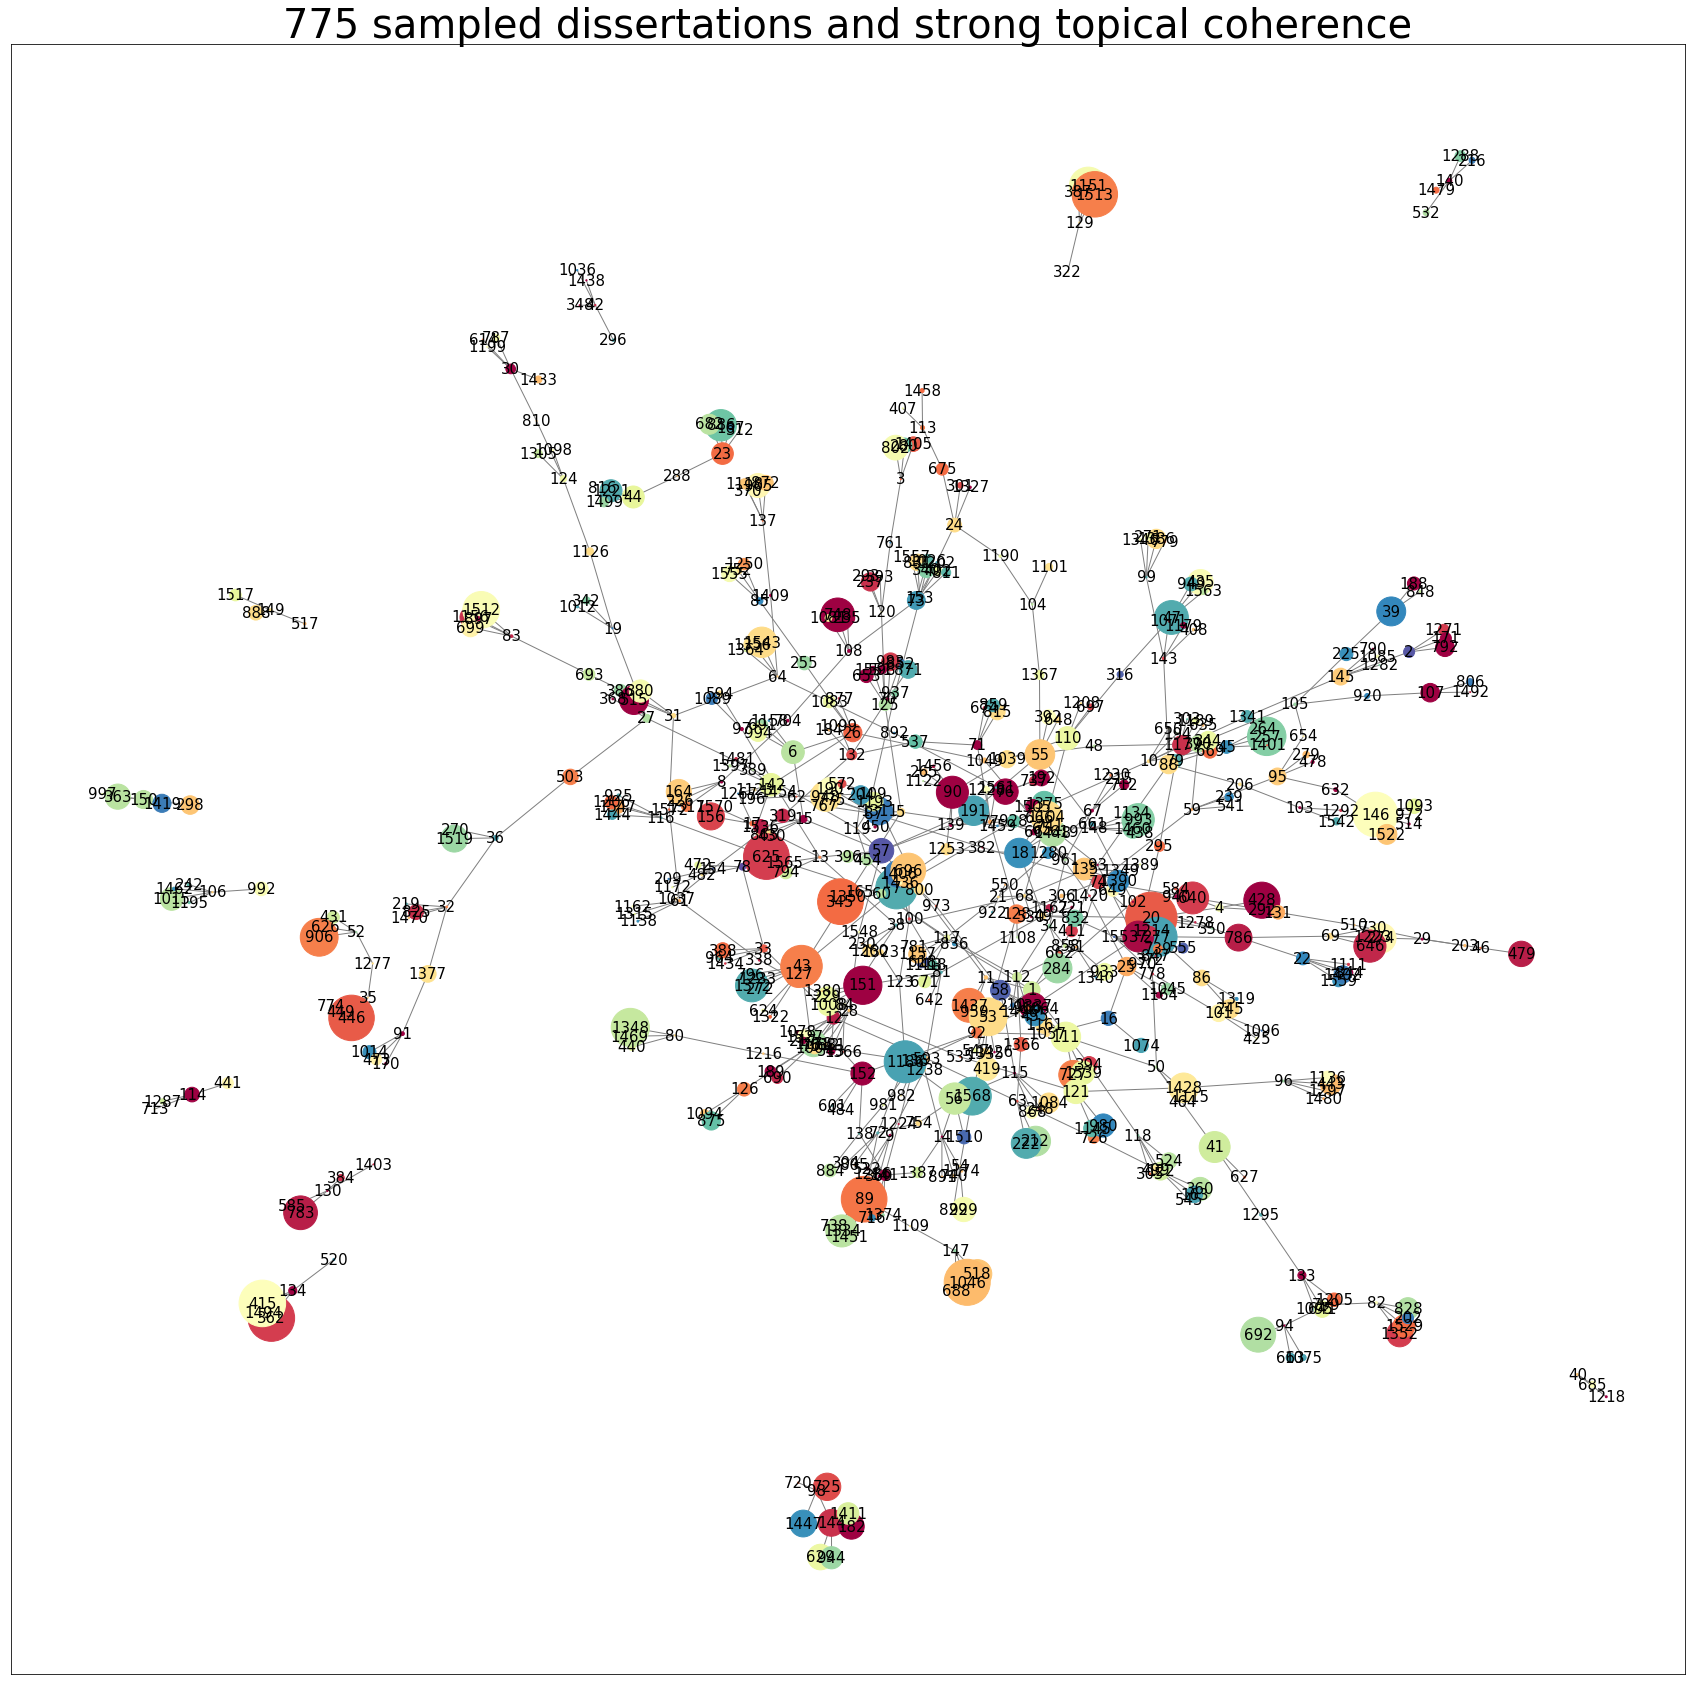

In [22]:
import matplotlib.patches as mpatches
cmap = plt.cm.Spectral


nx.draw_networkx(g, node_size = df3_top_5['weight1'].values * 4000, edge_color = 'grey', cmap = cmap, node_color = carac_top_5['Department'].cat.codes, font_size = 15, width = 1)
plt.title("775 sampled dissertations and strong topical coherence", fontsize = 40)
plt.gcf().set_size_inches(30, 30)
plt.savefig("ADRL_node_col_order.png", format="PNG")
plt.show()

Developing a key:

In [0]:
cmap = plt.cm.Spectral

val_map = {'Anthropology': 0,
           'Applied Maths': 1,
           'Art History': 2,
           'Biomolecular Science and Engineering': 3,
           'Chemical Engineering': 4, 
           'Chemistry:': 5, 
           'Chemistry and Biochemistry': 6, 
           'Chicana and Chicano Studies':7,
           'Classics': 8, 
           'Communication': 9, 
           'Comparative Literature': 10, 
           'Computer Science': 11,
           'Computer Science - Engineering': 12,
           'Counseling, Clinical and School Psychology': 13,
           'Department': 14,
           'Department of Economics': 15,
           'Dramatic Art': 16,
           'Earth Science': 17,
           'East Asian Languages and Cultural Studies': 18,
           'East Asian Languages and Cultures': 19,
           'Ecology, Evolution and Marine Biology': 20,
           'Ecology, Evolution, and Marine Biology': 21,
           'Economics': 22,
           'Education': 23,
           'Education - Gevirtz Graduate School': 24,
           'Education, Joint Program Cal Poly SLO': 24,
           'Electrical and Computer Engineering': 25,
           'English': 26,
           'Environmental Science and Management': 27,
           'Feminist Studies': 28,
           'Film and Media Studies': 29,
           'French': 30,
           'French and Italian': 31,
           'Geography': 32,
           'Geography, Joint Program SDSU': 33,
           'Geological Sciences': 34, 
           'Global and International Studies': 35,
           'Global Studies': 36,
           'History': 37,
           'Latin American and Iberian Studies': 38,
           'Linguistics': 39,
           'Marine Science': 40,
           'Materials': 41,
           'Mathematics': 42,
           'Mechanical Engineering': 43,
           'Media Arts and Technology': 44,
           'Molecular, Cellular, and Developmental Biology': 45, 
           'Music': 46, 
           'California Polytechnic State University. Education, Joint Program Cal Poly SLO': 47, 
           'San Diego State University. Geography': 48,
           'Philosophy': 49,
           'Physics': 50,
           'Political Science': 51,
           'Psychological and Brain Sciences': 52,
           'Psychology': 53,
           'Religious Studies': 54,
           'Sociology': 55, 
           'Spanish': 56, 
           'Spanish and Portuguese': 57,
           'Statistics and Applied Probability': 58,
           'Theater and Dance': 59,
           'Theater Studies': 60
          }

In [0]:
import matplotlib.colors
import matplotlib.cm as cmx

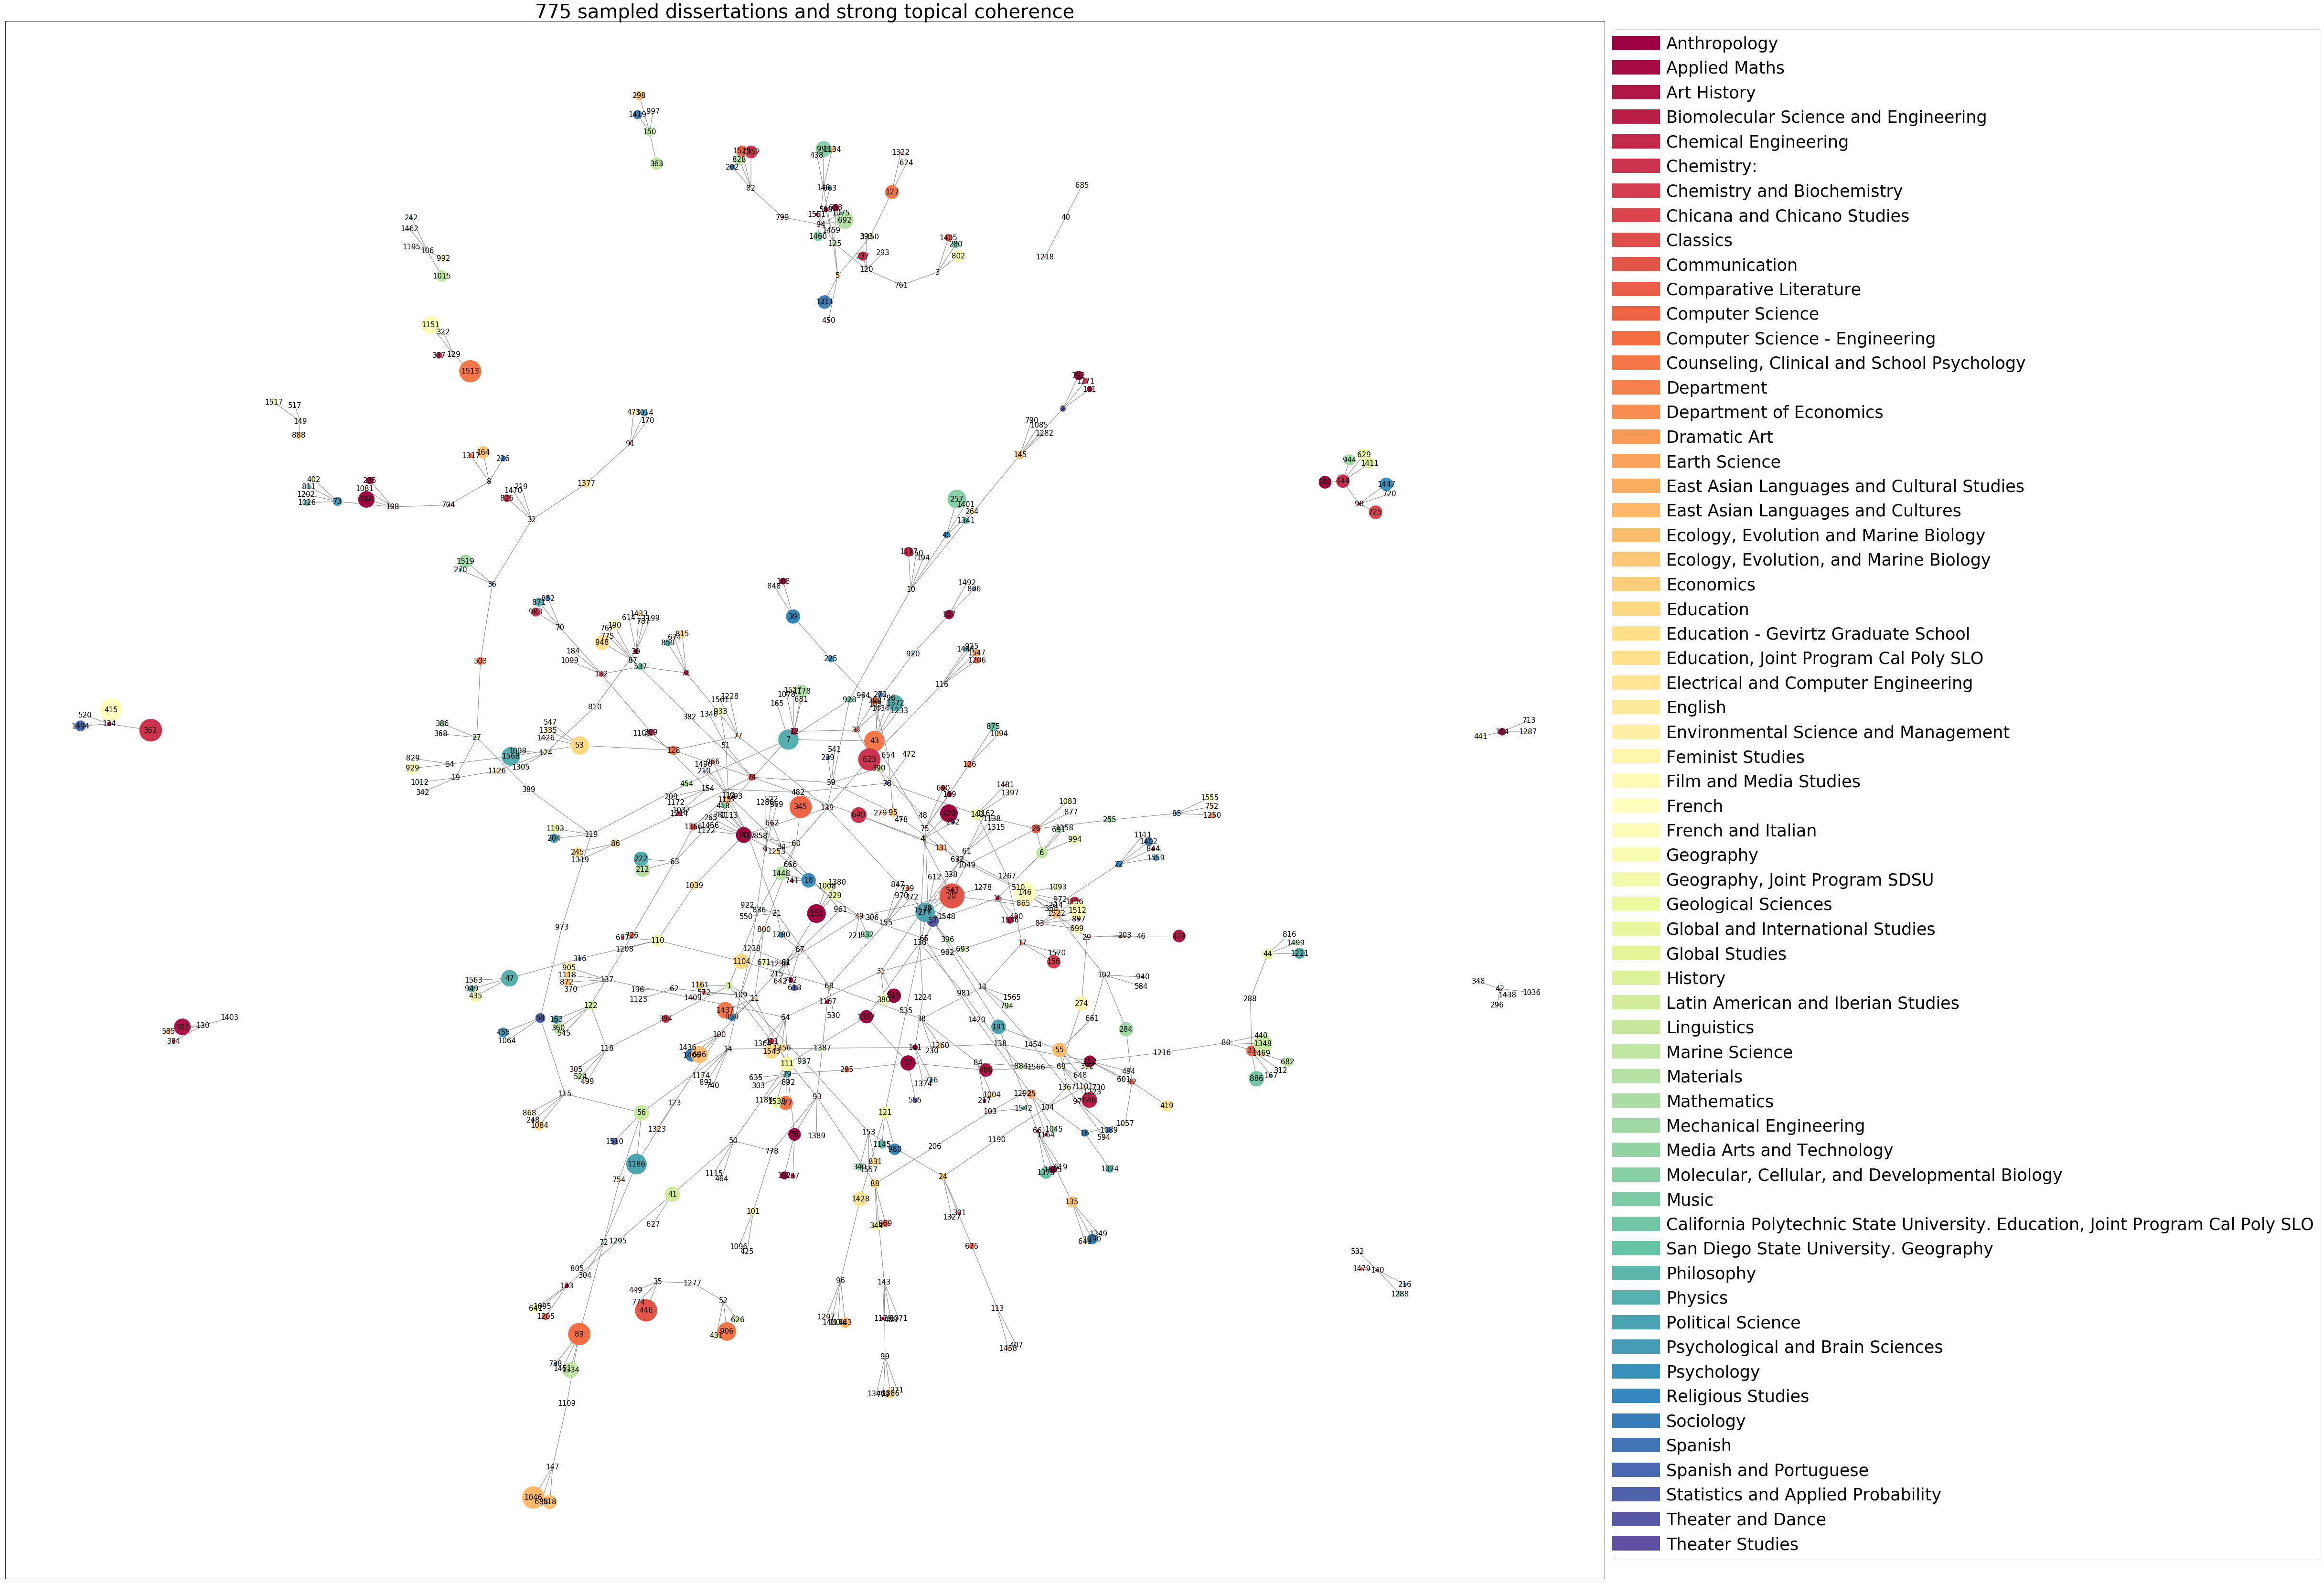

In [27]:
G = nx.from_pandas_edgelist(df3_top_5, source='source', target='target')
cmap = plt.cm.Spectral

values = carac_top_5['Department'].cat.codes

cNorm  = matplotlib.colors.Normalize(vmin=0, vmax=max(values))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

# Using a figure to use it as a parameter when calling nx.draw_networkx
f = plt.figure(1)
ax = f.add_subplot(1,1,1)

for label in val_map:
    ax.plot([0],[0],
            color=scalarMap.to_rgba(val_map[label]),
            label=label,
            lw = 30)

nx.draw_networkx(G, 
                 cmap = cmap, 
                 node_size = df3_top_5['weight1'].values * 4000, 
                 edge_color = 'grey', 
                 node_color = values, 
                 font_size = 15, 
                 width = 1, 
                 vmin=0, 
                 vmax= max(values),
                 with_labels=True,
                 ax=ax)

plt.title("775 sampled dissertations and strong topical coherence", fontsize = 40)
plt.gcf().set_size_inches(60, 60)
plt.savefig("ADRL.png", format="PNG")
plt.legend(loc='upper left', prop={'size': 35},bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The graph shows the 775 sampled nodes from the ADRL data. These nodes are embedded and located using their topic weight. This centralises nodes that have a low topic weighting, and the further out the node is embedded, the strong the topical coherence and the more the node is an outlier (in terms of it focussing on a niche topic). 

### Comparing the SOM and the Network
To enable a comparison between the SOM and the Network, the following steps are completed:
- Selecting 775 dissertations from 10 departments 
- pair the dissertations based on top 3 shared topics

To prepare the dataset we drop duplicate pairs:

In [60]:
df3_top_5.drop_duplicates(subset=None, keep='first', inplace=False)

Unnamed: 0 identifier topic_num    weight  \
identifier                                                   
f3000017   6682        6683   f3000017   topic25  0.017359   
           8704        8705   f3000017   topic25  0.017359   
           1364        1365   f3000017    topic1  0.054469   
           8455        8456   f3000017    topic7  0.071949   
f300002p   1752        1753   f300002p   topic25  0.005365   
...                     ...        ...       ...       ...   
f32j68vq   379          380   f32j68vq   topic25  0.144672   
           2443        2444   f32j68vq   topic19  0.000280   
           2397        2398   f32j68vq   topic19  0.000280   
           3619        3620   f32j68vq   topic19  0.000280   
           5545        5546   f32j68vq    topic7  0.076951   

                                          Department identifier1 topic_num1  \
identifier                                                                    
f3000017   6682                            Sociology    f3988547    topic25   
           8704                            Sociology    f3r49nr4    topic25   
           1364                            Sociology    f3jh3jcm     topic1   
           8455                            Sociology    f39021z9     topic7   
f300002p   1752                            Chemistry    f3sx6bb4    topic25   
...                                              ...         ...        ...   
f32j68vq   379   Electrical and Computer Engineering    f3ms3qzp    topic25   
           2443  Electrical and Computer Engineering    f3jq0z0k    topic19   
           2397  Electrical and Computer Engineering    f3gt5k9c    topic19   
           3619  Electrical and Computer Engineering    f36w988x    topic19   
           5545  Electrical and Computer Engineering    f38k7788     topic7   

                  weight1                           Department1  source  \
identifier                                                                
f3000017   6682  0.068768                           Mathematics       1   
           8704  0.033463                             Education       1   
           1364  0.004198      Global and International Studies       1   
           8455  0.066260                             Sociology       1   
f300002p   1752  0.030513                  Chemical Engineering       2   
...                   ...                                   ...     ...   
f32j68vq   379   0.133162                  Chemical Engineering     155   
           2443  0.015258                             Materials     155   
           2397  0.097098  Environmental Science and Management     155   
           3619  0.000466                               Physics     155   
           5545  0.052544                Spanish and Portuguese     155   

                 target  
identifier               
f3000017   6682     411  
           8704    1161  
           1364     836  
           8455     394  
f300002p   1752    1271  
...                 ...  
f32j68vq   379      970  
           2443     847  
           2397     739  
           3619     277  
           5545     372  

[632 rows x 11 columns]

Dropping N/A:

In [61]:
df3_top_5.dropna()

Unnamed: 0 identifier topic_num    weight  \
identifier                                                   
f3000017   6682        6683   f3000017   topic25  0.017359   
           8704        8705   f3000017   topic25  0.017359   
           6682        6683   f3000017   topic25  0.017359   
           1364        1365   f3000017    topic1  0.054469   
           8455        8456   f3000017    topic7  0.071949   
...                     ...        ...       ...       ...   
f32j68vq   379          380   f32j68vq   topic25  0.144672   
           2443        2444   f32j68vq   topic19  0.000280   
           2397        2398   f32j68vq   topic19  0.000280   
           3619        3620   f32j68vq   topic19  0.000280   
           5545        5546   f32j68vq    topic7  0.076951   

                                          Department identifier1 topic_num1  \
identifier                                                                    
f3000017   6682                            Sociology    f3988547    topic25   
           8704                            Sociology    f3r49nr4    topic25   
           6682                            Sociology    f3988547    topic25   
           1364                            Sociology    f3jh3jcm     topic1   
           8455                            Sociology    f39021z9     topic7   
...                                              ...         ...        ...   
f32j68vq   379   Electrical and Computer Engineering    f3ms3qzp    topic25   
           2443  Electrical and Computer Engineering    f3jq0z0k    topic19   
           2397  Electrical and Computer Engineering    f3gt5k9c    topic19   
           3619  Electrical and Computer Engineering    f36w988x    topic19   
           5545  Electrical and Computer Engineering    f38k7788     topic7   

                  weight1                           Department1  source  \
identifier                                                                
f3000017   6682  0.068768                           Mathematics       1   
           8704  0.033463                             Education       1   
           6682  0.068768                           Mathematics       1   
           1364  0.004198      Global and International Studies       1   
           8455  0.066260                             Sociology       1   
...                   ...                                   ...     ...   
f32j68vq   379   0.133162                  Chemical Engineering     155   
           2443  0.015258                             Materials     155   
           2397  0.097098  Environmental Science and Management     155   
           3619  0.000466                               Physics     155   
           5545  0.052544                Spanish and Portuguese     155   

                 target  
identifier               
f3000017   6682     411  
           8704    1161  
           6682     411  
           1364     836  
           8455     394  
...                 ...  
f32j68vq   379      970  
           2443     847  
           2397     739  
           3619     277  
           5545     372  

[775 rows x 11 columns]

 Here we select the Departments to use in the comparison between the SOM and the Network:
- Chemistry
- Computer Science
- Education
- Electrical and Computer Engineering
- Geography
- History
- Materials
- Physics
- Psychology
- Sociology

In [63]:
df4_top_5 = df3_top_5.loc[df3_top_5['Department'].isin(['Chemistry','Computer Science', 'Education','Electrical and Computer Engineering','Geography','History','Materials','Physics','Psychology','Sociology'])]
df5_top_5 = df4_top_5.loc[df4_top_5['Department1'].isin(['Chemistry','Computer Science', 'Education','Electrical and Computer Engineering','Geography','History','Materials','Physics','Psychology','Sociology'])]
#df6_top_5 = df2_top_5.loc[df2_top_5['identifier1'].isin([['f3zw1j1w','f3rf5rzn','f3ms3qvb','f3pg1pw4','f3ws8rfr','f36h4fms','f3wh2mxb','f3jm27tc','f3m61h6q']])]

df4_top_5.head()

Unnamed: 0 identifier topic_num    weight Department  \
identifier                                                              
f3000017   6682        6683   f3000017   topic25  0.017359  Sociology   
           8704        8705   f3000017   topic25  0.017359  Sociology   
           6682        6683   f3000017   topic25  0.017359  Sociology   
           1364        1365   f3000017    topic1  0.054469  Sociology   
           8455        8456   f3000017    topic7  0.071949  Sociology   

                identifier1 topic_num1   weight1  \
identifier                                         
f3000017   6682    f3988547    topic25  0.068768   
           8704    f3r49nr4    topic25  0.033463   
           6682    f3988547    topic25  0.068768   
           1364    f3jh3jcm     topic1  0.004198   
           8455    f39021z9     topic7  0.066260   

                                      Department1  source  target  
identifier                                                         
f3000017   6682                       Mathematics       1     411  
           8704                         Education       1    1161  
           6682                       Mathematics       1     411  
           1364  Global and International Studies       1     836  
           8455                         Sociology       1     394

#### Building a lookup table for the nodes from the 10 departments


In [64]:
lookup_10 = lookup.loc[lookup['identifier'].isin(df4_top_5['identifier'])]
lookup_10.head()

Unnamed: 0  key identifier  \
17           22   21   f32b8xv8   
47           54   53   f30k28cn   
99          124  123   f30c4sz5   
113         143  142   f31n7z9x   
168         212  211   f30z71gs   

                                                 title  year  \
17   Ultra-Narrow Bandwidth Optical Resonators for ...  2016   
47   Hidden Markov Models for Analysis of Multimoda...  2016   
99   The 51%: Gender, Feminism, and Culture in the ...  2015   
113  Laica o Libre : The 1958 university reforms an...  2015   
168  Determining Phase Stability in the Co-Al-W Sys...  2015   

                     author  \
17        Spencer, Daryl T.   
47    Shenoy, Renuka Vidyut   
99   Hurwitz, Heather McKee   
113      Nemirovsky, Damian   
168        Dodge, Philip C.   

                                        degree_grantor  \
17   University of California, Santa Barbara. Elect...   
47   University of California, Santa Barbara. Elect...   
99   University of California, Santa Barbara. Socio...   
113   University of California, Santa Barbara. History   
168  University of California, Santa Barbara. Mater...   

                              department  degree_supervisor  \
17   Electrical and Computer Engineering     John E. Bowers   
47   Electrical and Computer Engineering       Kenneth Rose   
99                             Sociology       Verta Taylor   
113                              History         David Rock   
168                            Materials  Matthew R. Begley   

                                           description  
17   The development of narrowband resonators has f...  
47   Modern advances in imaging technology have ena...  
99   Social movements researchers have explained th...  
113  My dissertation studies the conflict that prec...  
168  Co-based superalloys are a promising new mater...

In [0]:
Department_lookup_10 = dict(zip(lookup_10, range(len(lookup_10))))
key_10 = lookup_10.key
Department_10 = lookup_10.department

In [66]:
carac_10 = pd.DataFrame({'key': key_10,
        'Department': Department_10
        })
carac_10.head()

key                           Department
17    21  Electrical and Computer Engineering
47    53  Electrical and Computer Engineering
99   123                            Sociology
113  142                              History
168  211                            Materials

In [67]:
carac_10.drop_duplicates(subset='Department', keep='first', inplace=True)
carac_10.dropna()
carac_10.head()

key                           Department
17    21  Electrical and Computer Engineering
99   123                            Sociology
113  142                              History
168  211                            Materials
199  248                            Chemistry

In [0]:
g = nx.from_pandas_edgelist(df4_top_5, source='source', target='target')

In [69]:
carac_10 = carac_10.set_index(carac_10['key'])
carac_10=carac_10.reindex(g.nodes())
carac_10.head()

key Department
key                 
1     NaN        NaN
411   NaN        NaN
1161  NaN        NaN
836   NaN        NaN
394   NaN        NaN

And transform the categorical column in a numerical value: Department0->0, Department1->1.

In [73]:
carac_10['Department']=pd.Categorical(carac_10['Department'])
carac_10['Department'].cat.codes

key
1      -1
411    -1
1161   -1
836    -1
394    -1
       ..
155    -1
970    -1
847    -1
739    -1
372    -1
Length: 327, dtype: int8

In [0]:
carac_10.to_csv('carac_10.csv', sep=',')

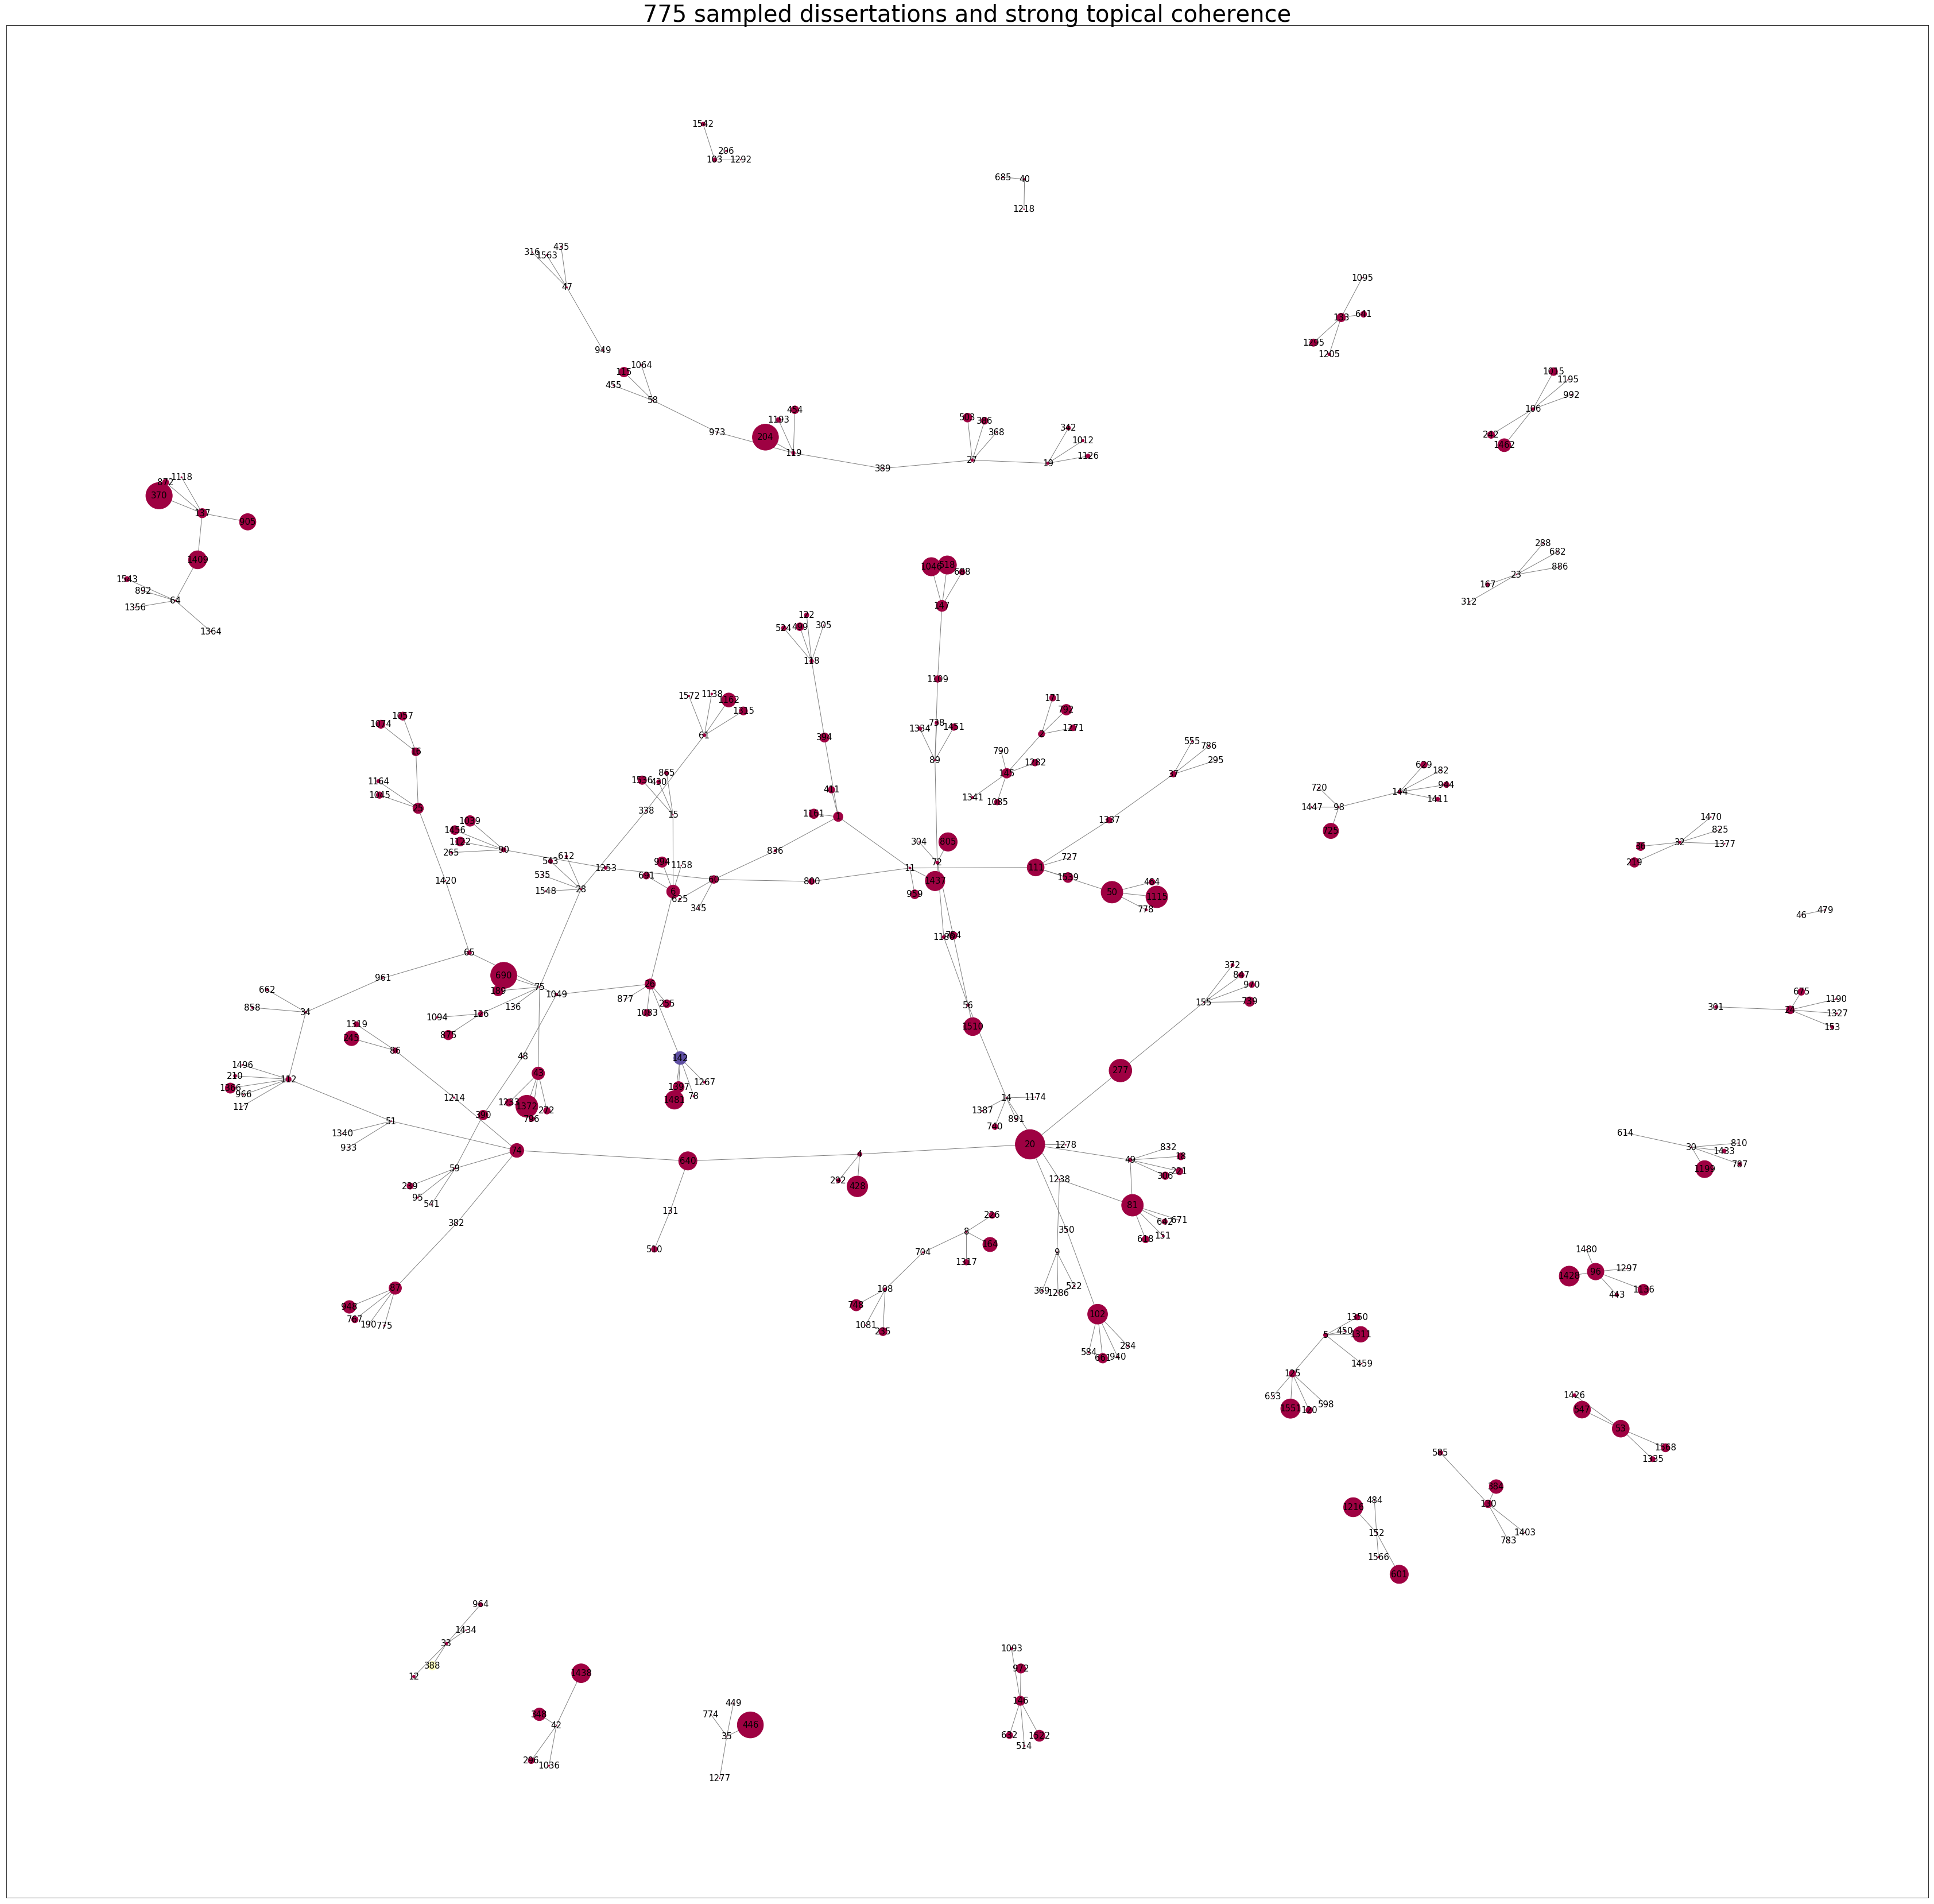

In [75]:
import matplotlib.patches as mpatches
cmap = plt.cm.Spectral


nx.draw_networkx(g, node_size = df4_top_5['weight1'].values * 4000, edge_color = 'grey', cmap = cmap, node_color = carac_10['Department'].cat.codes, font_size = 15, width = 1)
plt.title("775 sampled dissertations and strong topical coherence", fontsize = 40)
plt.gcf().set_size_inches(60, 60)
plt.savefig("ADRL_node_col_order.png", format="PNG")
plt.show()

In [0]:
cmap = plt.cm.Spectral
val_map_10_dep = {'Chemistry': 0,
                  'Computer Science': 1,
                  'Education': 2,
                  'Electrical and Computer Engineering': 3,
                  'Geography': 4,
                  'History': 5,
                  'Materials': 6,
                  'Physics': 7,
                  'Psychology': 8,
                  'Sociology': 9 
                 }

In [96]:
import matplotlib.colors
import matplotlib.cm as cmx
cNorm  = matplotlib.colors.Normalize(vmin=0, vmax=max(val_map_10_dep))

ValueError: ignored

In [0]:
f = nx.from_pandas_edgelist(df4_top_5, source='source', target='target')


In [0]:
cmap = plt.cm.Spectral
colors = [n for n in range(len(f.nodes()))]

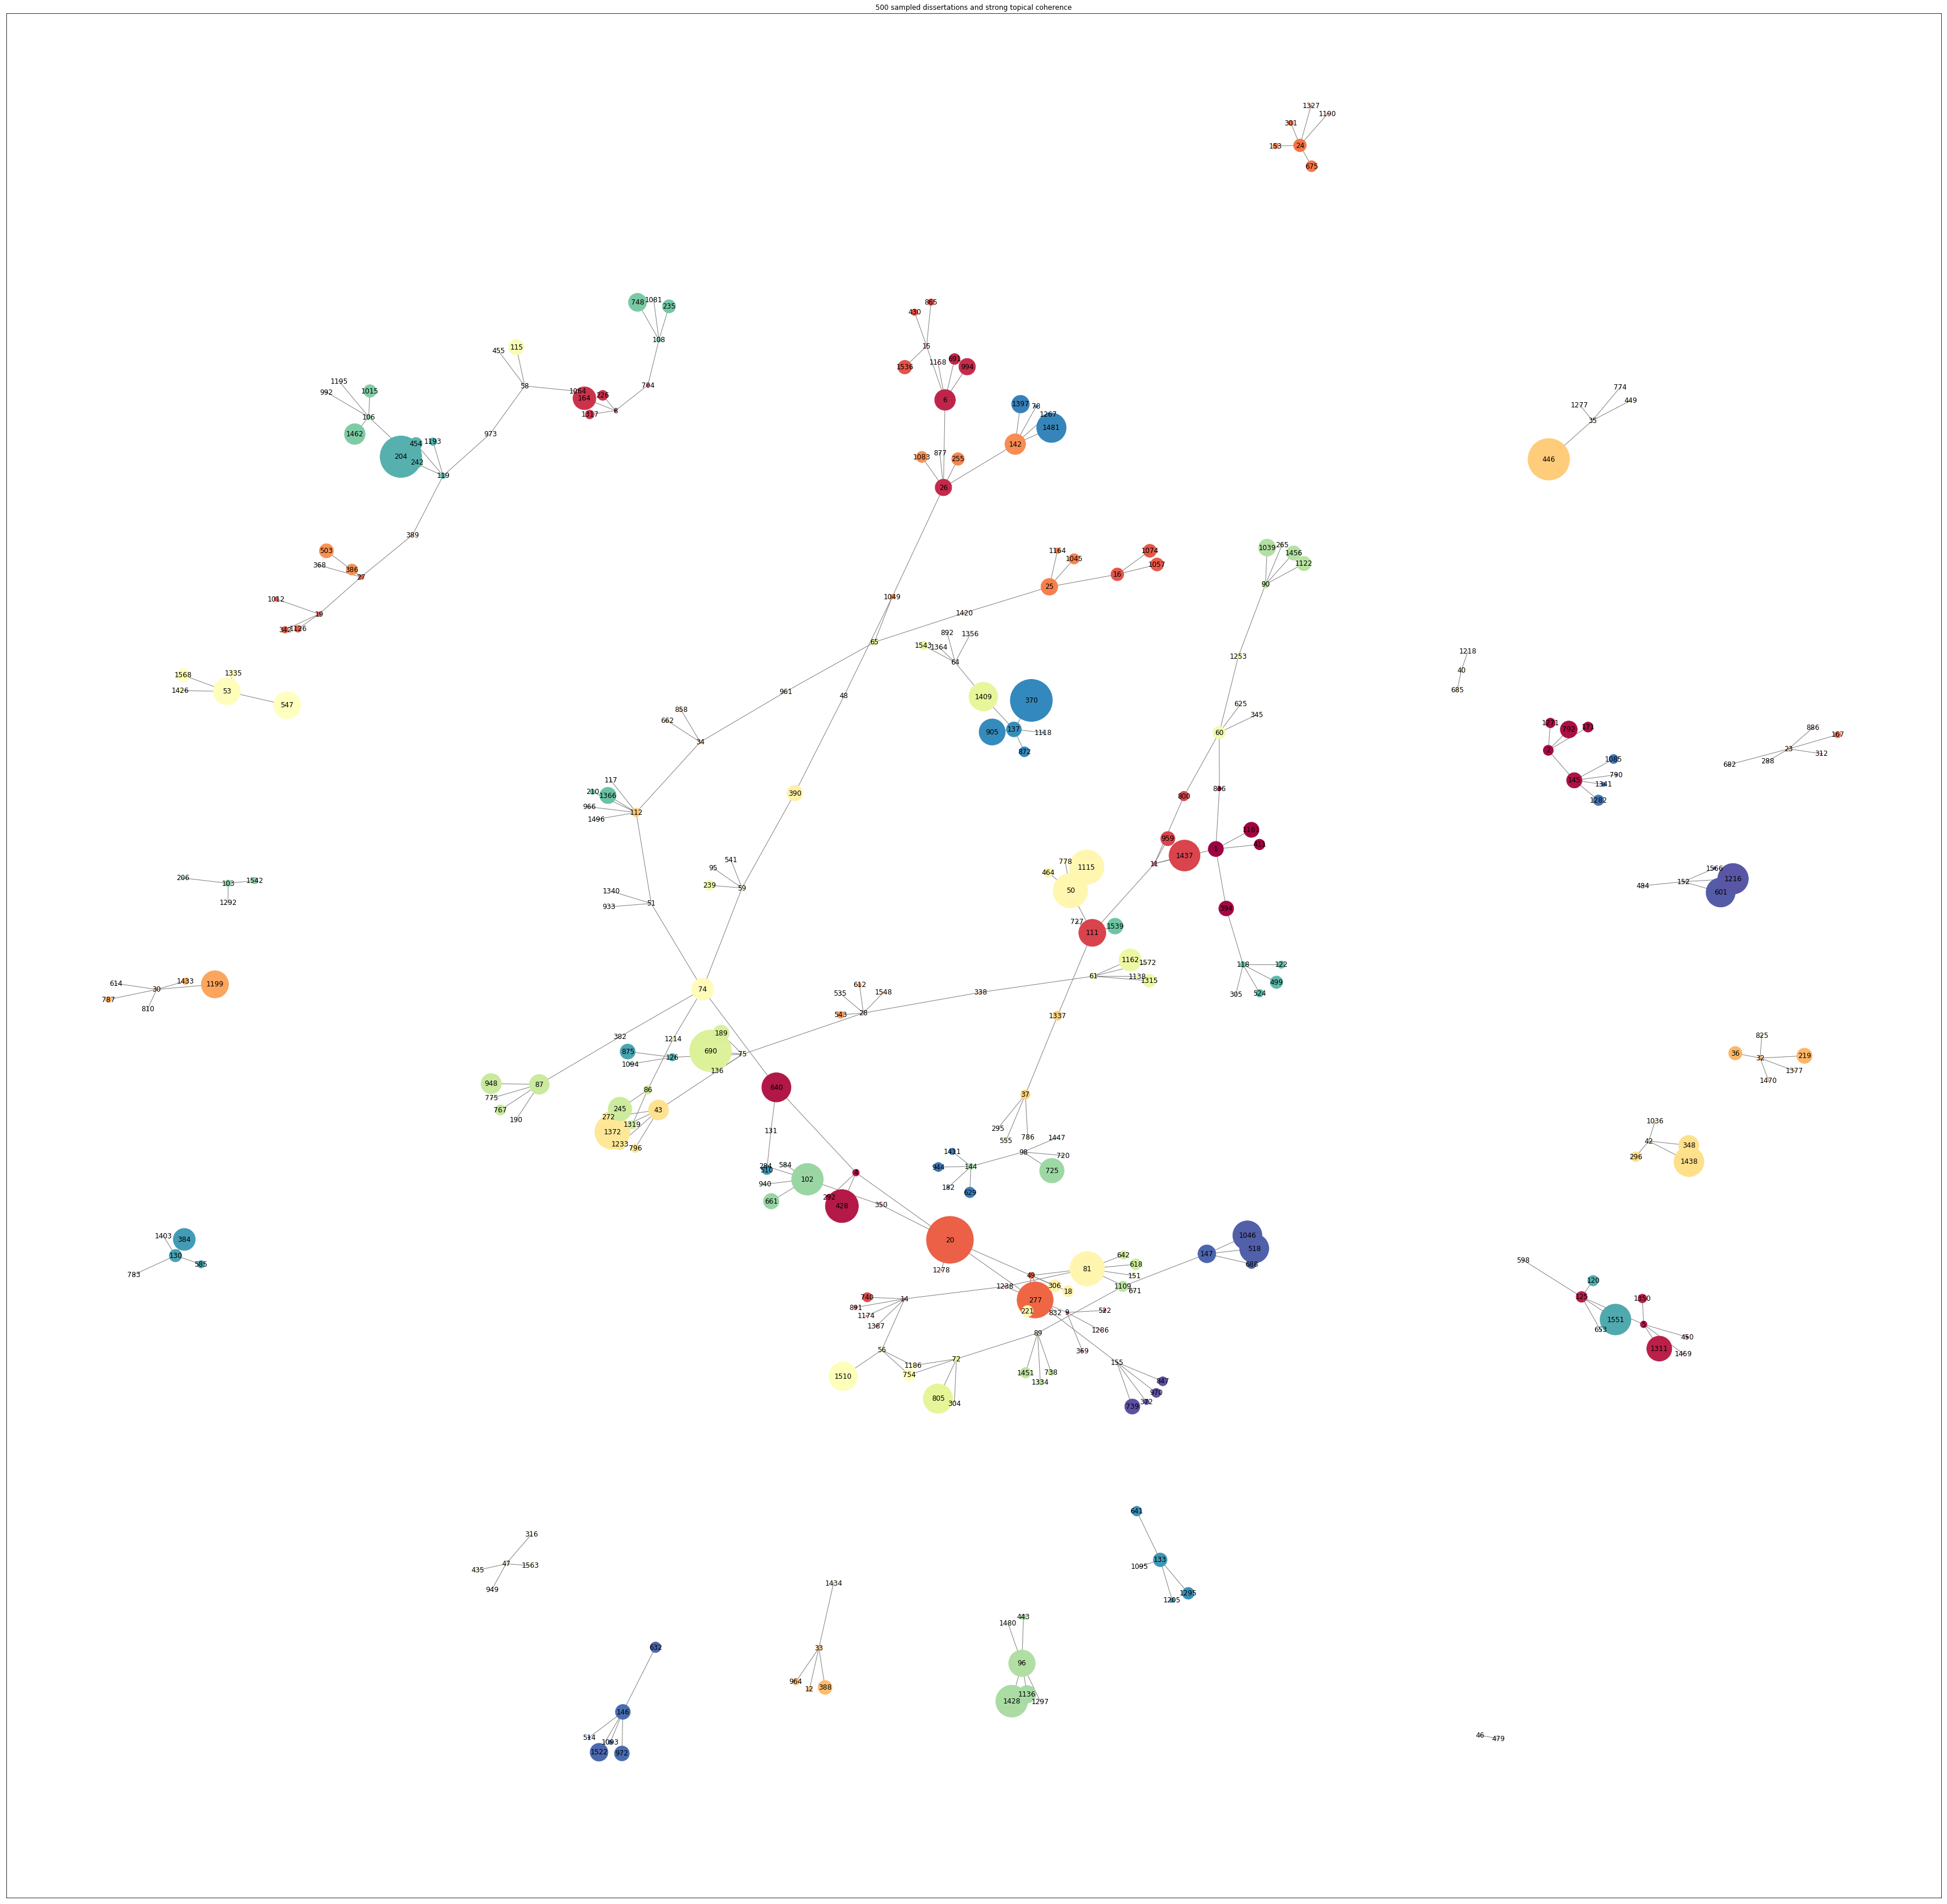

In [100]:
nx.draw_networkx(f, node_size = df4_top_5['weight1'].values * 10000, edge_color = 'grey', cmap = cmap, node_color = colors, width = 1)
plt.title("500 sampled dissertations and strong topical coherence")
plt.gcf().set_size_inches(60, 60)
plt.savefig("ADRL_10_dep_node_color_no_text.png", format="PNG")
plt.show()

#### Comparing selected dissertations in Network and Self Organising Map
Now we will select key nodes to understand the similarities and differences of spatialising tabular data in Self Organising Maps and Networks.

In [0]:
Cluster_lookup = pd.read_csv('ADRL_UTF.csv', delimiter = ',', error_bad_lines=False, index_col = 2)
Cluster_lookup.head()

We chose to assign dissertations the role of nodes. A node list is a set of objects that consists of a list of all the individual dissertations (nodes). Selecting the following nodes:
- f3zw1j1w' (Psychology)
- 'f3rf5rzn' (Education)
- 'f3ms3qvb' (Psychology)
- 'f3pg1pw4' (Sociology)
- 'f3ws8rfr' (Geography)
- 'f36h4fms' (Music)
- 'f3wh2mxb' (Sociology)
- 'f3jm27tc' (Geography)
- 'f3m61h6q' (Computer Science - Engineering)

enables us to compare the results of the Self-Organising Map and the Network. Code adapted from https://stackoverflow.com/questions/14665767/networkx-specific-nodes-labeling/14667533

#### Selecting nodes corresponding to the selected dissertations
The following nodes are selected from the dataset and illustrate how a network visualisation can aid the search for thematically related documents. 

In [0]:
url_select_dissertations = 'https://raw.githubusercontent.com/saralafia/adrl/master/3_network/DF_TOP_5_SELECTED_DISSERTATIONS.csv'

No handles with labels found to put in legend.


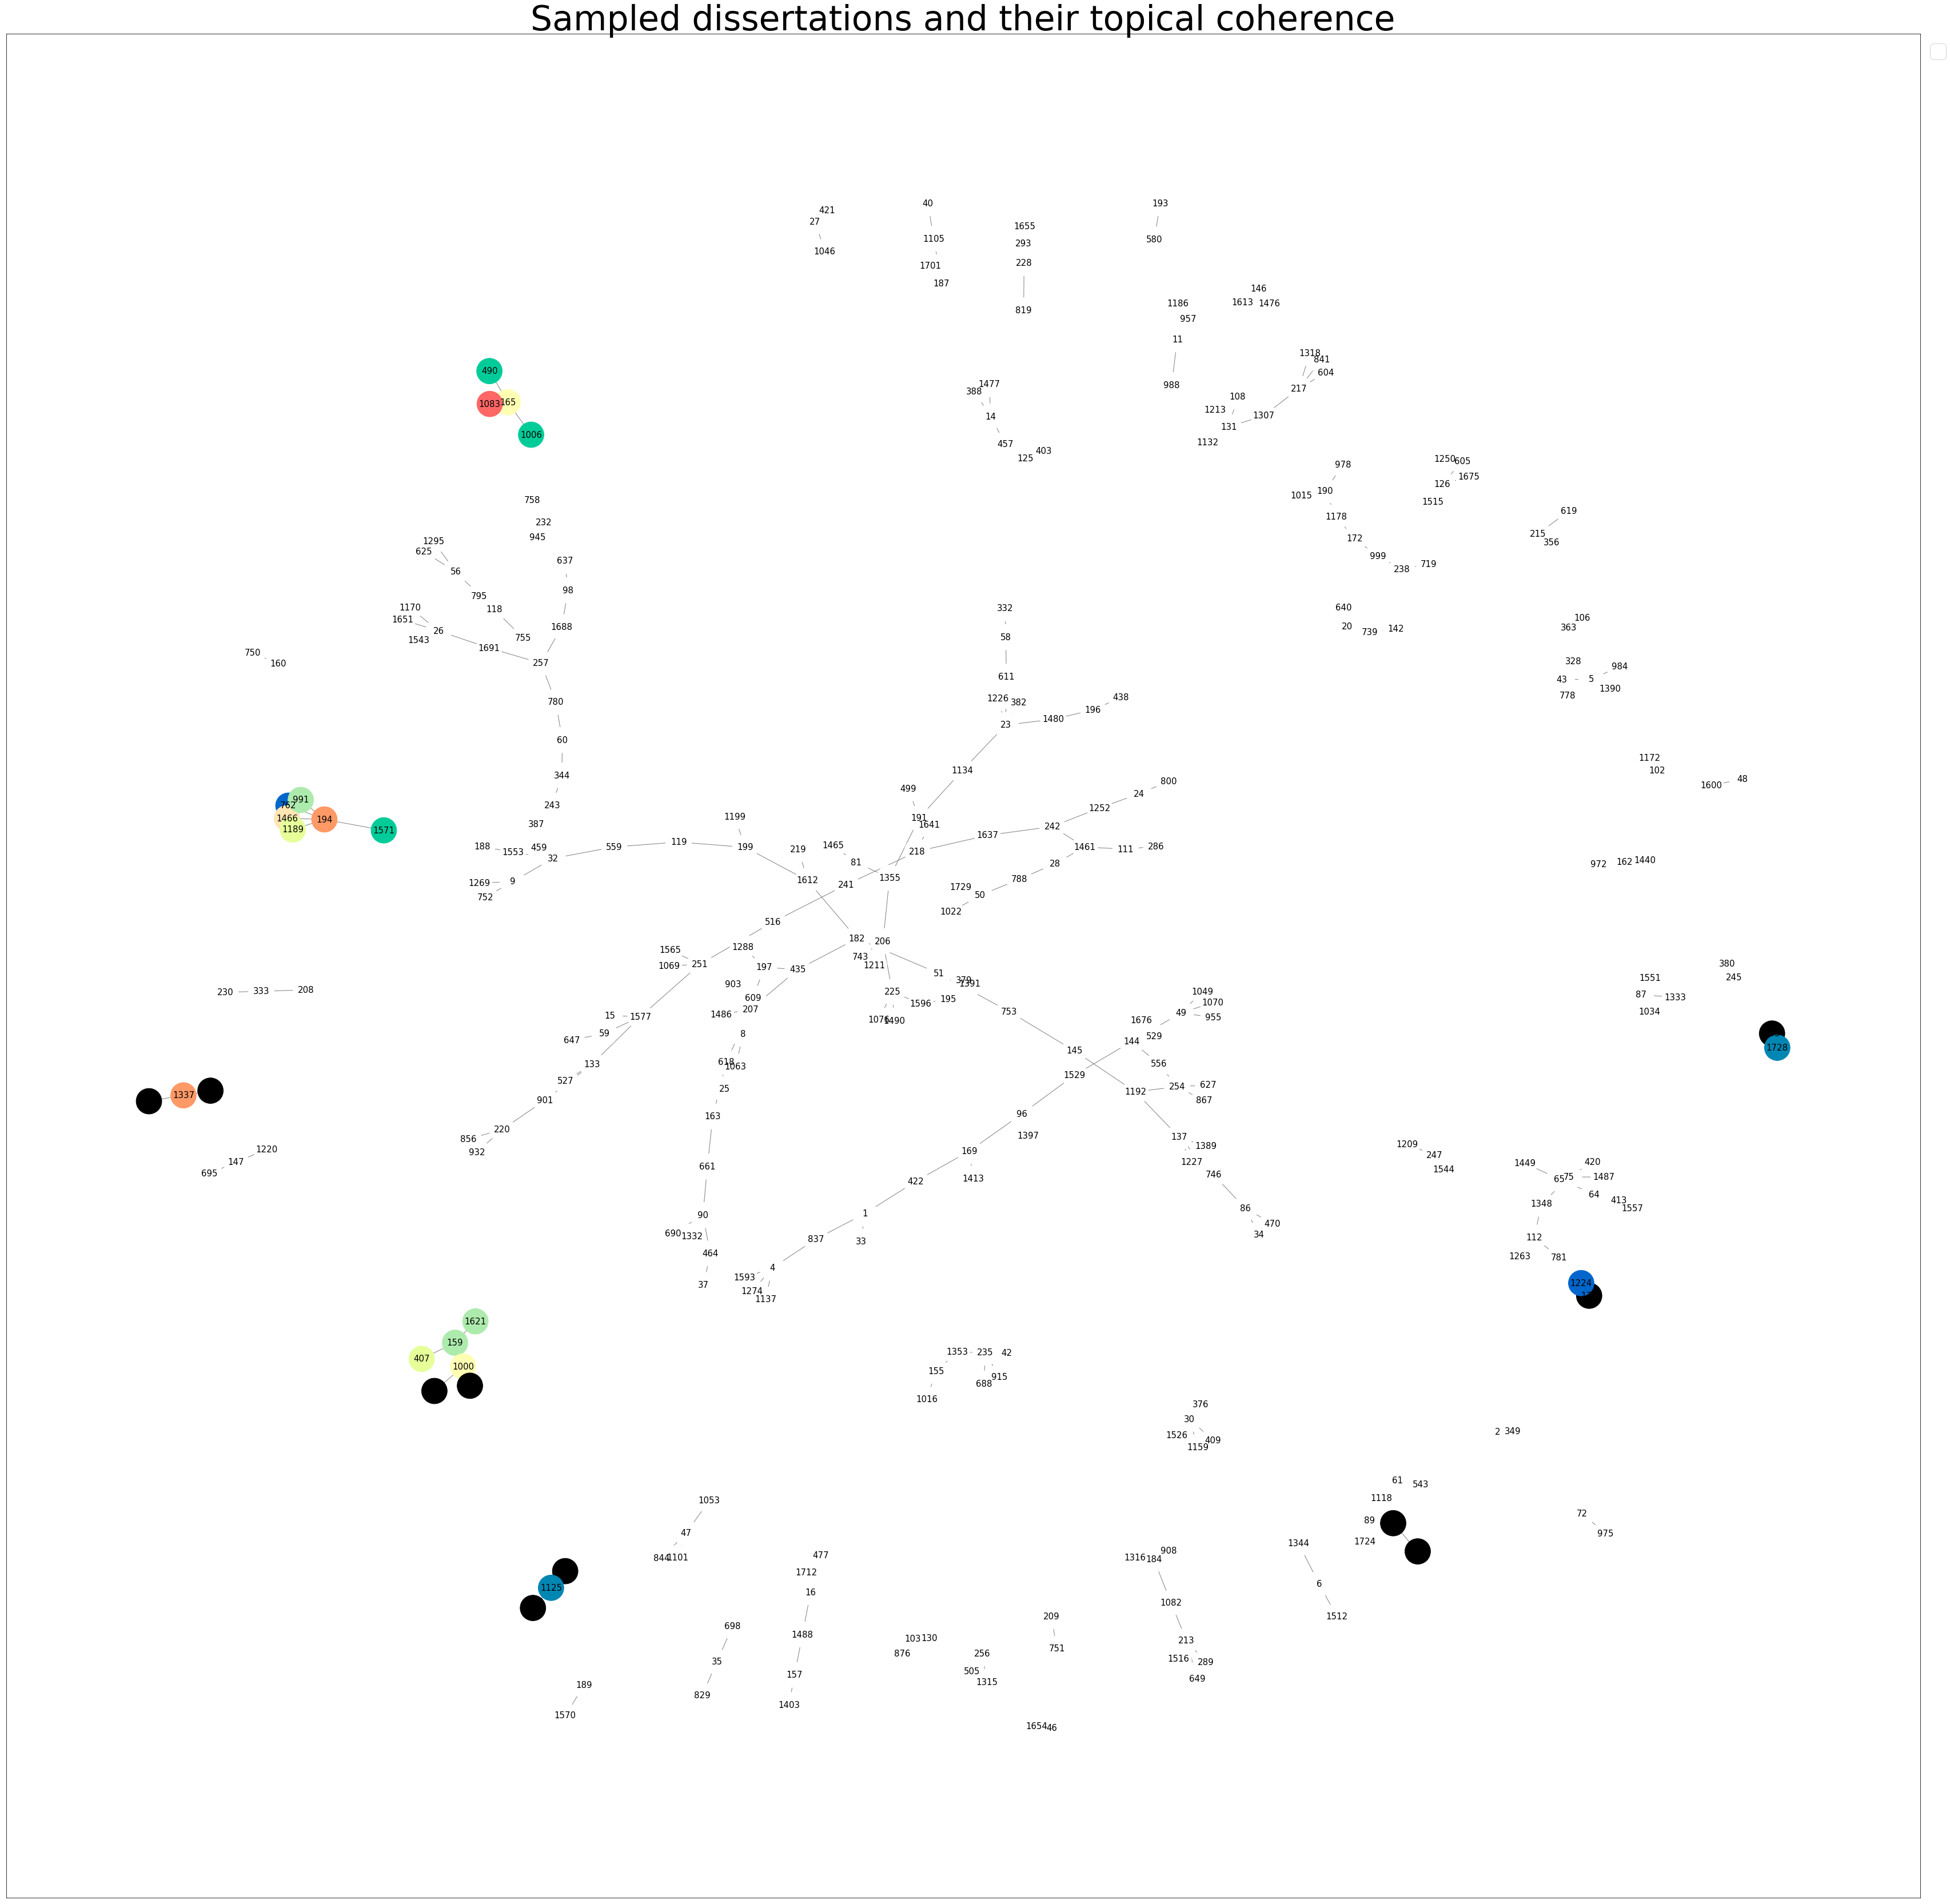

In [104]:
df6_top_5 = pd.read_csv(url_select_dissertations, delimiter = ',', low_memory=False,  encoding='latin-1')

G = nx.from_pandas_edgelist(df6_top_5, source='source', target='target')

color_map = []
for node in G:
    if node == 762:
        color_map.append('#0066cc')
    elif node == 194:
        color_map.append('#ff9966')
    elif node == 1083:
        color_map.append('#ff6666')
    elif node == 165:
        color_map.append('#ffffb3')
    elif node == 1000:
        color_map.append('#ffffb3')
    elif node == 10:
        color_map.append('black')
    elif node == 170:
        color_map.append('black')
    elif node == 159:
        color_map.append('#adebad')
    elif node == 104:
        color_map.append('black')
    elif node == 1603:
        color_map.append('black')
    elif node == 173:
        color_map.append('black')
    elif node == 1224:
        color_map.append('#0066cc')
    elif node == 200:
        color_map.append('black')
    elif node == 1125:
        color_map.append('#0086b3')
    elif node == 156:
        color_map.append('black')
    elif node == 1728:
        color_map.append('#0086b3')
    elif node == 1337:
        color_map.append('#ff9966')
    elif node == 234:
        color_map.append('black')
    elif node == 490:
        color_map.append('#00cc99')
    elif node == 1006:
        color_map.append('#00cc99')
    elif node == 122:
        color_map.append('black')
    elif node == 1311:
        color_map.append('black')
    elif node == 122:
        color_map.append('black')
    elif node == 407:
        color_map.append('#e6ff99')
    elif node == 1621:
        color_map.append('#adebad')
    elif node == 135:
        color_map.append('black')
    elif node == 1466:
        color_map.append('#ffe6b3')
    elif node == 991:
        color_map.append('#adebad')
    elif node == 1571:
        color_map.append('#00cc99')
    elif node == 1189:
        color_map.append('#e6ff99')
    else: color_map.append('white')      
    

f = plt.figure(1)
ax = f.add_subplot(1,1,1)

nx.draw_networkx(G, node_size = 2000,
                 edge_color = 'grey',
                 node_color = color_map, 
                 font_color = 'black',
                 font_size = 15, 
                 width = 1, 
                ax = ax)
plt.title("Sampled dissertations and their topical coherence", fontsize = 60)
plt.gcf().set_size_inches(60, 60)
plt.savefig("ADRL_selected_dissertations.png", format="PNG")
plt.legend(loc='upper left', prop={'size': 35},bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()